<a href="https://colab.research.google.com/github/zaedulislam/PyTorch_for_Deep_Learning_and_Computer_Vision/blob/main/Section%207%20-%20Image%20Recognition%20-%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip3 install torch
!pip3 install torchvision

# Alternatively, both packages can be installed in one line using the following command
# !pip3 install torch torchvision

## torchvision
The **torchvision** is a standard package that contains many types of datasets, most notably the enhanced image dataset and it also consists of transformations that are commonly applied to these images in order to preprocessed them before they are fed into a neural network.

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

Currently, [MNIST images](https://www.notion.so/islamzaedul/Section-7-Image-Recognition-PyTorch-2348e3c44df44cc4833575befa5f1259#545240f4a81f4518900c7c51cc5db4d9) are 28 by 28 greyscale images, which would imply that each image is a two dimensional numpy array. Twenty eight pixels wide and twenty eight pixels long, each pixel intensity ranging from 0 to 255.

We must transform this image from being an array to a tensor. The compose will allow to chain together transformations.



1. simply convert the numpy array in the range of 0 to 255 to a float tensor in the range from 0 to 1 encoded in a tensor shape which characterises the images channel height and weight (**C, H, W**) like [this](https://www.notion.so/islamzaedul/Section-7-Image-Recognition-PyTorch-2348e3c44df44cc4833575befa5f1259#6d9cc704476a4290a8795a5ce54cfe1e).

2. Apply the normalized transformation so transforms do normalize. We normalized the values for each transfer of image, size, channel height and width. The first set of brackets, we specified the mean that we would like to use to normalize all channels of the tensor image. In the second set of brackets, we specified the center deviation.

The reason why we chose **0.5** values for all of them is because ultimately we want to convert the tensor image range to go from 0, 1 to -1, -1. The way it does this is take, for example, the minimum value of zero by subtracting the mean and dividing by standard deviation, both of which are **0.5**, it yields a -1.

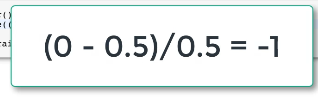

Doing the same thing for the maximum value yields a value of **1**, hence creating the range from **-1** to **1**.

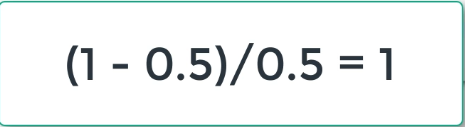

### Why would we want our image values to range from negative one to one?
In essence, normalization helps reduce Skewness and distortions within the data, ensuring a more effective learning process once that image data is fed into the neural network. Using this normalization with **0.5** values is one of many normalization schemas.




In [14]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])



**Arguments**

* `root='./data'` -> dataset will be saved in `data` directory
* `download=True` -> MNIST dataset will be downloaded in `data` folder
* `transform` -> The `transform` argument simply dictates any image manipulations applied to the images.

In [15]:
trainingDataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



* Number of datapoints: 60000 - It provided us with 60000 training images

In [17]:
trainingDataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


## Analyze Images Dataset by Plotting
To plot the tensor image, it is required to change back to a numpy array.

 The converted numpy array has a shape where the first dimension now represents the **color channel**, the second and third dimensions represent the **width** and the **height** of the image and pixels. Ultimately, this dataset is a greyscale corresponding to a single color channel with a weight and height of   28 by 28 pixels. Hence the shape would be **1, 28, 28**. To plot our image, we require to have a **28, 28, 1** shape.

* `image = image.transpose(1, 2, 0)` - We swap axis 0 for axis 1, axis 1 for axis 2 and axis 0 in the end.

* `image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))` - Normalization process consists of subtracting the mean and dividing by the standard deviation. So to **denormalize** we would multiply by any standard deviation and add the mean.

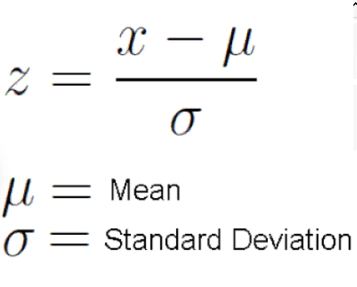

* `image.clip(0, 1)` - Finally, to ensure that the range is indeed between 0 1, apply the clip function to a minimum value of 0 and the maximum value of 1.

In [19]:
def imageConvertFromTensorToNumpy(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)